**WEEK 2 PROJECT: EXPLORATORY DATA ANALYTICS.**

**Data Overview and Cleaning.**

In [92]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [6]:
# Loading the dataset

data = pd.read_csv("1. Weather Data.csv ")
data.head

<bound method NDFrame.head of              Date/Time  Temp_C  Dew_Point_Temp_C  Rel_Hum_%  Wind_Speed_km/h  \
0     01/01/2012 00:00    -1.8              -3.9         86                4   
1     01/01/2012 01:00    -1.8              -3.7         87                4   
2     01/01/2012 02:00    -1.8              -3.4         89                7   
3     01/01/2012 03:00    -1.5              -3.2         88                6   
4     01/01/2012 04:00    -1.5              -3.3         88                7   
...                ...     ...               ...        ...              ...   
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      Vis

In [9]:
# Number of records

data.shape

(8784, 8)

In [11]:
# Checking for datatypes.

data.dtypes

Date/Time            object
Temp_C              float64
Dew_Point_Temp_C    float64
Rel_Hum_%             int64
Wind_Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [13]:
# Summary of the dataset and checking for null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew_Point_Temp_C  8784 non-null   float64
 3   Rel_Hum_%         8784 non-null   int64  
 4   Wind_Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [15]:
# Checking for duplicates

data.duplicated().sum()


0

**Statistical Summary.**

In [18]:
# Using the describe function to get statistical summary of the dataset.

data.describe()

,Temp_C,Dew_Point_Temp_C,Rel_Hum_%,Wind_Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [20]:
# Renaming multiple columns

data.rename(columns = {
    'Temp_C':'Temp.',
    'Dew_Point_Temp_C':'D.P_Temp',
    'Rel_Hum_%':'Hum_%',
    'Wind_Speed_km/h':'Wind_Speed',
    'Visibility_km':'Visibility',
    'Press_kPa':'Pressure',
    'Weather':'Weather_Condition'
    }, inplace = True)
data

,Date/Time,Temp.,D.P_Temp,Hum_%,Wind_Speed,Visibility,Pressure,Weather_Condition
0,01/01/2012 00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,01/01/2012 01:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,01/01/2012 02:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,01/01/2012 03:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,01/01/2012 04:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [22]:
# Checking for null values.

data.isnull().sum()

Date/Time            0
Temp.                0
D.P_Temp             0
Hum_%                0
Wind_Speed           0
Visibility           0
Pressure             0
Weather_Condition    0
dtype: int64

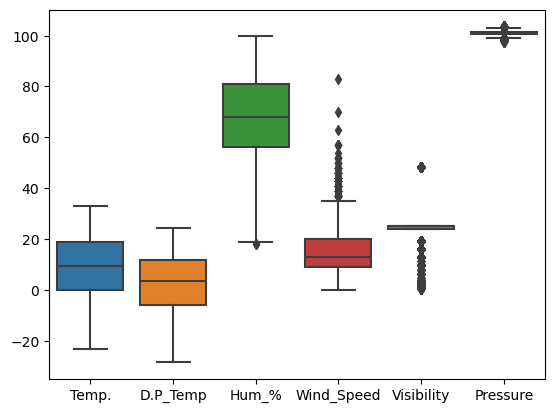

In [24]:
# Identifying significant outliers in the dataset.

sns.boxplot(data=data)
plt.show()

In [26]:
# Describing significant outliers in the dataset.

def outliers(data,ft):
    # Calculation the 25th and 75th percentile.
    Q1 = data[ft].quantile(0.25)
    Q3 = data[ft].quantile(0.75)
    # Calculationg the interquartile range
    IQR = Q3 - Q1
    # Calculating boundaries, +/- 1.5*IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_list = data.index[ (data[ft] < lower_bound) | (data[ft] > upper_bound)]
    
    return outlier_list


In [28]:
# Listing the columns to check for outliers.
columns = ['Temp.','D.P_Temp','Hum_%','Wind_Speed','Visibility','Pressure']

# Creating an empty list to store the output indices.
indices_list = []

# Using a for loop to extract the outliers for all the columns.
for ft in columns:
    indices_list.extend(outliers(data,ft))


In [30]:
# Removing duplicates
indices_list = list(set(indices_list))

# Checking the list
indices_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 8207,
 22,
 8215,
 8216,
 25,
 8217,
 8218,
 8219,
 8220,
 8221,
 8222,
 32,
 33,
 34,
 8223,
 36,
 37,
 8224,
 8225,
 8226,
 8227,
 8228,
 8229,
 8230,
 8231,
 8232,
 47,
 8233,
 8234,
 50,
 8244,
 8257,
 8258,
 8259,
 8260,
 8261,
 8262,
 8263,
 8264,
 8265,
 8266,
 8267,
 8268,
 8269,
 8270,
 8271,
 8272,
 8273,
 8274,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 106,
 107,
 108,
 109,
 110,
 111,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 8315,
 132,
 8316,
 134,
 135,
 136,
 8320,
 138,
 8322,
 8323,
 8324,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 8359,
 8360,
 8361,
 178,
 183,
 8383,
 8384,
 8385,
 8386,
 8387,
 8388,
 8389,
 8390,
 8391,
 200,
 201,
 202,
 8392,
 8408,
 8409,
 218,
 8412,
 221,
 222,
 223,
 224,
 

In [32]:
# Removing outliers
data_cleaned = data.drop(indices_list)

# Checking the data shape
data_cleaned.shape


(5069, 8)

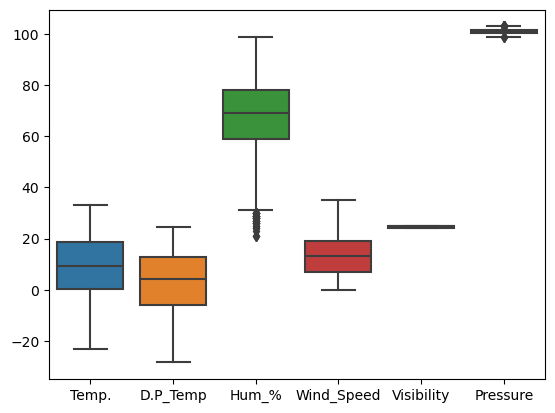

In [34]:
# Confirming there are no outliers

sns.boxplot(data=data_cleaned)
plt.show()

In [36]:
data_cleaned


,Date/Time,Temp.,D.P_Temp,Hum_%,Wind_Speed,Visibility,Pressure,Weather_Condition
20,01/01/2012 20:00,3.2,1.3,87,19,25.0,99.50,Cloudy
21,01/01/2012 21:00,4.0,1.7,85,20,25.0,99.39,Cloudy
23,01/01/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,01/02/2012 00:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
26,01/02/2012 02:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8762,12/31/2012 2:00,-10.1,-13.4,77,9,25.0,101.45,Cloudy
8763,12/31/2012 3:00,-11.8,-14.4,81,6,25.0,101.42,Mostly Cloudy
8764,12/31/2012 4:00,-10.5,-12.8,83,11,25.0,101.34,Cloudy
8765,12/31/2012 5:00,-10.2,-12.4,84,6,25.0,101.28,Cloudy


In [38]:
data['Hum_%'].mean()

67.43169398907104

**Data Visualization.**

In [65]:
# Create visualizations to show the distribution of key weather parameters (e.g., temperature, humidity, wind speed).

correlation_matrix = data_cleaned[['Temp.','D.P_Temp','Hum_%','Wind_Speed','Visibility','Pressure']].corr()
correlation_matrix


,Temp.,D.P_Temp,Hum_%,Wind_Speed,Visibility,Pressure
Temp.,1.000000,0.964307,-0.022454,-0.066803,-0.203153,-0.374835
D.P_Temp,0.964307,1.000000,0.239581,-0.092287,-0.187516,-0.404382
Hum_%,-0.022454,0.239581,1.000000,-0.119765,0.049368,-0.151855
Wind_Speed,-0.066803,-0.092287,-0.119765,1.000000,-0.217819,-0.287113
Visibility,-0.203153,-0.187516,0.049368,-0.217819,1.000000,0.157217
Pressure,-0.374835,-0.404382,-0.151855,-0.287113,0.157217,1.000000


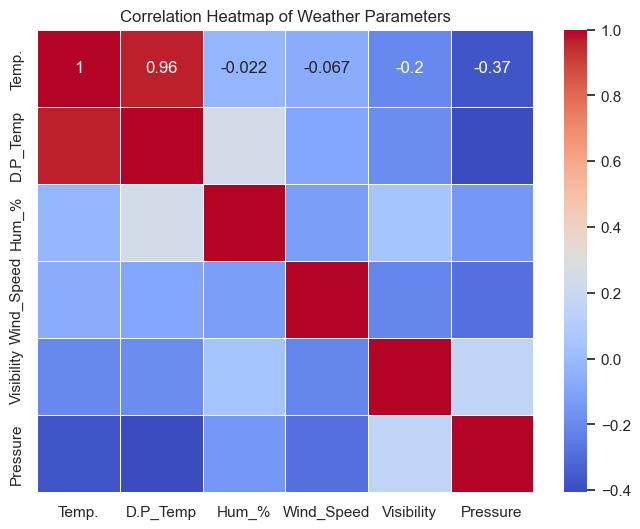

In [98]:
# Creating a correlation heatmap of weather parameters
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Weather Parameters')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

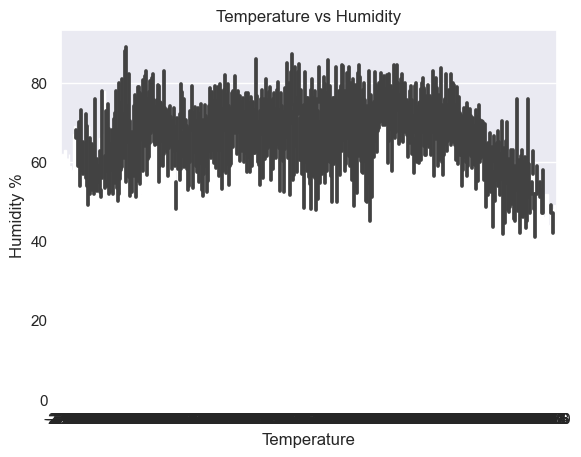

In [104]:
# creating a barplot for temperature versus humidity
# sns.set()
sns.barplot(x=data_cleaned['Temp.'],y=data_cleaned['Hum_%'])
#adding the labels and a title
plt.xlabel('Temperature')
plt.ylabel('Humidity %')
plt.title('Temperature vs Humidity')
# Displaying the visualization
plt.show

Text(0.5, 1.0, 'Distribution of Humidity')

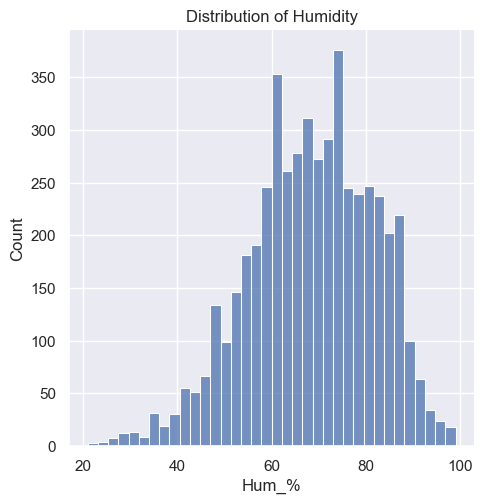

In [102]:
sns.displot(data_cleaned['Hum_%'])
plt.title('Distribution of Humidity')

**Weather Patterns and Trends.**

**Insights and Conclusions.**

**Recommendations for Further Analysis.**